# Introduction to Simple Linear Regression: Evaluation

## Learning Objectives and outcomes

- $R^{2}$ - score for a linear regression

- Discussion of statsmodel output for a linear regression.

- Assumptions of linear regression

- Interpretting significance and p_values.

In [1]:
!open .

'open' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read data to a dataframe
data = pd.read_csv('data/Advertising.csv', index_col=0)[['TV', 'Sales']]

print(data.shape)
data.head()

(200, 2)


,TV,Sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9


## (From this morning) Linear Regression with `statsmodels`

There is another library that we can use for linear models which is `statsmodels`.  `statsmodels` is much more robust than `sklearn` for linear models, but is much less extensible.

- [check the documentation](http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS)

- Now let's use statsmodel to fit a linear model to our data.

In [3]:
import statsmodels.api as sm

__Your Turn__

- Try to use statsmodel library to fit a line to the advertising dataset.

In [4]:
data

,TV,Sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9
...,...,...
196,38.2,7.6
197,94.2,9.7
198,177.0,12.8
199,283.6,25.5


In [6]:
X = data.TV.values
y = data.Sales.values


In [7]:
X.reshape(-1,1)

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [9]:
model = sm.OLS(y,X, hasconstant=False)

In [10]:
results = model.fit()

In [11]:
results.params

array([0.08324961])

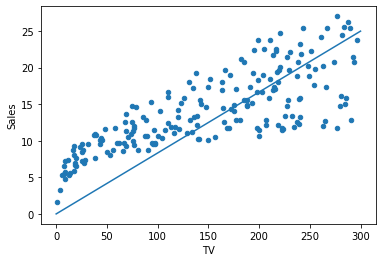

In [15]:
data.plot(x='TV', y='Sales', kind='scatter')
x_pred = np.linspace(0,300,300)
plt.plot(x_pred, results.predict(x_pred))

In [ ]:
from sklearn import LinearRegression


## Understanding $R^{2}$

Note that if we want to predict sales naively a good choice could be the means sales.

In [ ]:
plt.scatter(X, y)
xmin, xmax = plt.xlim()

plt.hlines(y=y.mean(),
           xmin=xmin, xmax=xmax,
           label='Mean Sales Across Cities is %.2f' % y.mean(), color='green')

plt.title('Predicting Sales from Mean')

plt.legend()

plt.tight_layout()

But as we can see this is not explaining what is going on in the data very well. We know this amount of errors as Total Sum of Squares.


$$ \text{Total Sum of Squares} = \sum\limits_{i=1}^{200} (y_{i} - \bar{y})^{2} $$

In [ ]:
y_bar = y.mean()

TSS = sum((y - y_bar)**2)

print(TSS)

But after we fit a linear regression line we have a better fit than just "mean"

In [ ]:
y_pred = fitted_model.predict(Xconst)

In [ ]:
# this plots the actual data.
plt.scatter(X, y)

# this plots the 'best' line
plt.scatter(X, y_pred)

As we can see this line is also not 'perfect' from prediction point of view. Let's see how much is the total amount of error this time.

$$ \text{Squared Sum of Residuals} = \sum\limits_{i=1}^{200} (y_i - \text{y_pred}_{i})^{2}$$

In [ ]:
residuals = y - y_pred

## We will be 
RSS = sum(residuals**2)

RSS

In [ ]:
print('Total Squared Sum  is %.3f '%TSS)
print('Residual Squared Sum is %.3f'%RSS)

$R^{2}$ measurement is just their ratio:

 $$ R^{2} = \frac{TSS - RSS}{TSS} $$

In [ ]:
R_squared = (TSS - RSS)/TSS

R_squared

## Using `statsmodels.api`  - $R^2$ and Making Predictions

In [ ]:
X = data.TV.values

Xconst = sm.add_constant(X)

y = data.Sales

In [ ]:
# we first construct our model
model = sm.OLS(y, Xconst, hasconst=True)

# by fitting we learn 'best' coefficients for intercept and slope
fitted_model = model.fit()


# with summary method we can see all the relevant statistics.
fitted_model.summary()

Suppose our company wants to invest $230K in TV ads in a city, how much sales would you expect on average for this city?

In [ ]:
fitted_model.predict([1, 230])

In [ ]:
intercept = fitted_model.params[0]

slope = fitted_model.params[1]

Note that this prediction is noting but 

$$ \text{Sales} = 0.0475 \times 230 + 7.0326 $$

In [ ]:
our_prediction = slope * 230 + intercept
our_prediction

## Now with `sklearn`

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X, y)

In [ ]:
# best slope value slope
m = lr.coef_

In [ ]:
## best intercept value
b = lr.intercept_

In [ ]:
y_pred = m*X + b

In [ ]:
plt.scatter(X, y)
plt.scatter(X, y_pred)

plt.xlabel('TV_ads')

plt.ylabel('Sales in thosands of units')

In [ ]:
from sklearn.metrics import r2_score

## P values and Significance

- To clarify the difference between population parameters and the estimates from data we will work with simulated data in this section.

In [ ]:
# Here we will work with a toy case
# note that y ≈ 3X + 5 so we know population parameters in this case.
# irr_error is random error due to some measurement errors.

X = np.random.uniform(low=0, high=10, size=100)
irr_error = np.random.normal(loc=0, scale=1, size=100)

y = 3*X + 5 + irr_error

In [ ]:
plt.scatter(X,y)
plt.title('A Hypothetical Case: We know that $y = 3 \cdot X + 5 + \epsilon$')
plt.show()

__Your Turn!__ Use sklearn to fit 100 linear models for the data X, y above. Don't forget to add random error each time. The idea is each time we sample from a population we will have some variation inevitably.

In [ ]:
coef_list_b0 = []
coef_list_b1 = []

Now let's look at distributions of $\hat{b}_{0}$ and $\hat{b}_{1}$:

In [ ]:
plt.hist(coef_list_b0)
plt.title("Histogram for the distribution of $\widehat{b}_{0}$")
plt.xlabel("Value of $\widehat{b}_{0}$ for each different sample of size 100")
plt.show()

In [ ]:
plt.hist(coef_list_b1)
plt.title("Histogram for the distribution of $\widehat{b}_{1}$")
plt.xlabel("Value of $\widehat{b}_{1}$ for each different sample of size 100")
plt.show()

## Further Reading <a name='further_reading'></a>

- [What is the parameter copy_X in sklearn](https://stackoverflow.com/questions/52541717/what-is-the-parameter-copy-x-in-sklearn-linear-regression)

- https://newonlinecourses.science.psu.edu/stat501/node/252/

- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

- https://lagunita.stanford.edu/assets/courseware/v1/e4f2f4823252ead8c1a68722e3415c28/c4x/HumanitiesSciences/StatLearning/asset/linear_regression-handout.pdf